## IMPORTING REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import keras
from keras import layers
keras.backend.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## LOADING THE DATASET

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train.drop("label", axis = 1).copy()
X_test = test.copy()
Y_train = train["label"].copy()
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## DATA PREPROCESSING

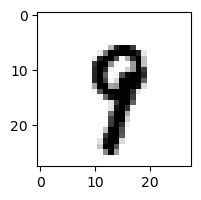

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)


fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_train[random.randint(0,len(X_train)), :, :, 0], cmap='Greys', interpolation='nearest') 
plt.show()

## TRAIN AND TEST SPLIT

In [8]:
validation_size = 0.2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

## ONE HOT ENCODING

In [9]:
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.to_categorical(Y_val, num_classes = 10)

## MODEL BUILDING

In [10]:
def Conv_Neural_Net():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(layers.Dense(128, activation=tf.nn.relu))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10,activation=tf.nn.softmax))
    return model

In [11]:
model = Conv_Neural_Net()

## COMPILING THE MODEL

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

## TRAINING THE MODEL

In [14]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 15)

Epoch 1/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.1787 - accuracy: 0.9449 - val_loss: 0.1110 - val_accuracy: 0.9688
Epoch 2/15
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0680 - accuracy: 0.9790 - val_loss: 0.0606 - val_accuracy: 0.9823
Epoch 3/15
1050/1050 [==============================] - 26s 24ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0630 - val_accuracy: 0.9830
Epoch 4/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0592 - val_accuracy: 0.9838
Epoch 5/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0845 - val_accuracy: 0.9779
Epoch 6/15
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0607 - val_accuracy: 0.9861
Epoch 7/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0677 -

## TESTING THE MODEL

In [15]:
def predict(model, X, start,end):
    s = int(np.sqrt(end-start))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[start:end])
    for i in range(end-start):
        y_pred = np.argmax(preds[i])
        img = X[start+i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

1/1 [==============================] - 0s 99ms/step


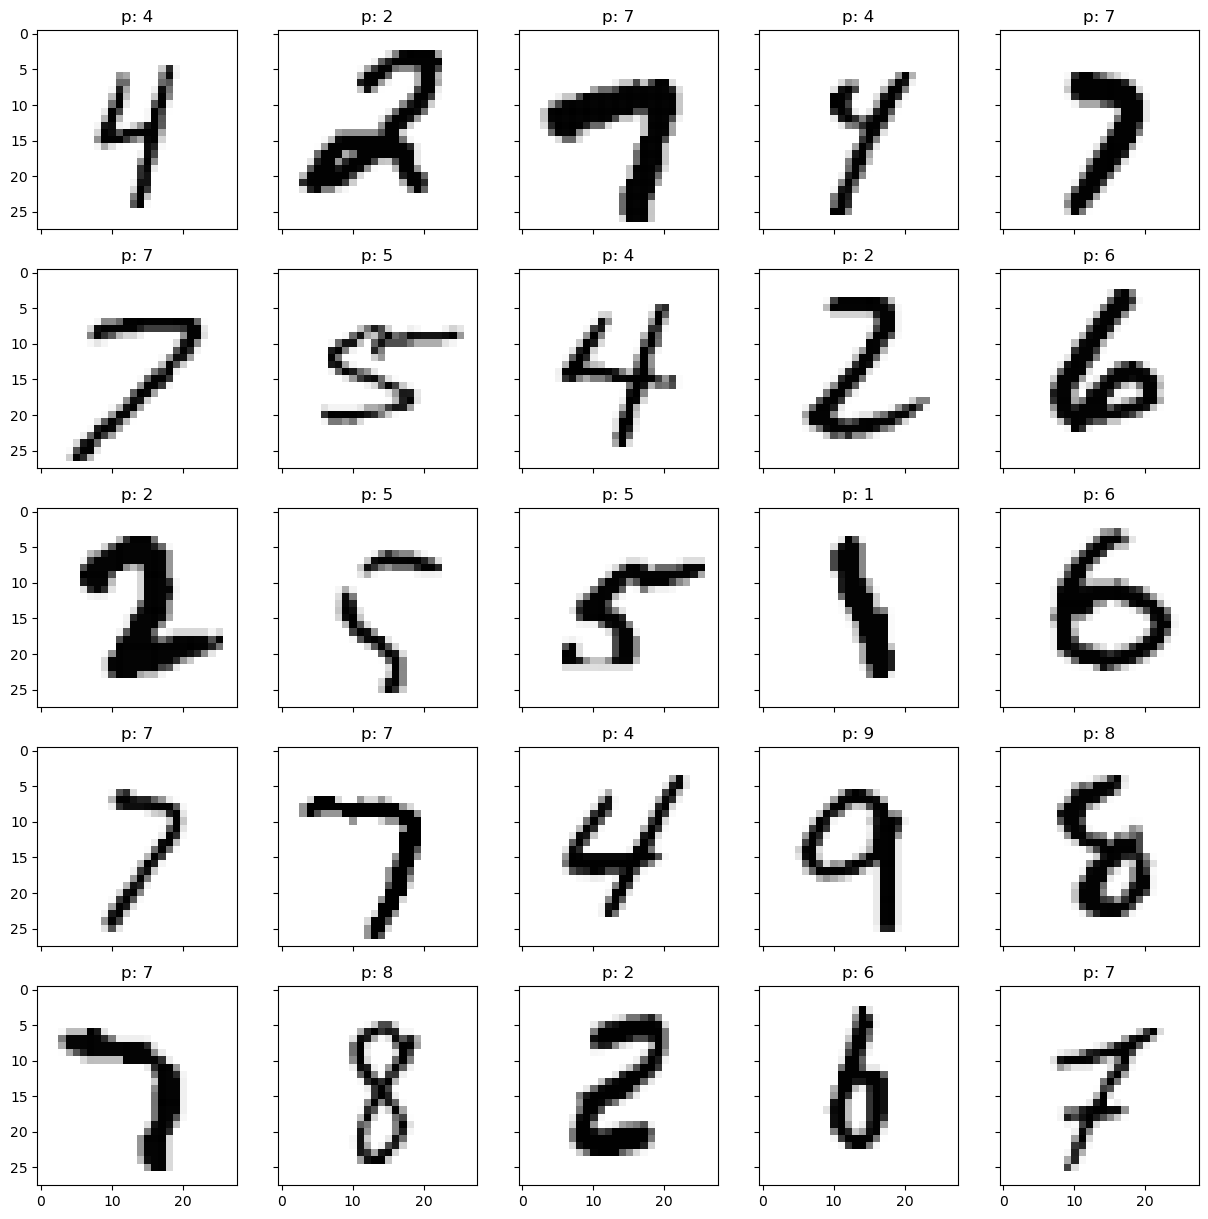

In [16]:
predict(model,X_test,25,50)

## SAVING THE MODEL

In [17]:
model.save('model.h5')